<a href="https://colab.research.google.com/github/chindimaga/SHALA2020/blob/master/Assignment_ML_LinearModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Linear Regression(SGD)**



---
Importing the required packages


---



In [0]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import california_housing
from sklearn.metrics import mean_squared_error
from scipy import stats
import seaborn as sns;
import random



---
Using the same dataset **california_housing** try to find the best fit of the dataset by implementing stocastic gradient descent from scratch. 


---



In [0]:
housing_data = california_housing.fetch_california_housing()

In [0]:
Features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
Target = pd.DataFrame(housing_data.target, columns=['Target'])
df = Features.join(Target)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [0]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


This is the data. Try to fit SGD from scratch 

In [0]:
df = df[df.Target<5]

In [0]:
def Norm(A):
    minval = A.min()
    maxval = A.max()
    return minval, maxval, pd.Series([(i - minval)/(maxval-minval) for i in A])
mini, maxi, X = Norm(df.MedInc)
mino, maxo, y = Norm(df.Target)

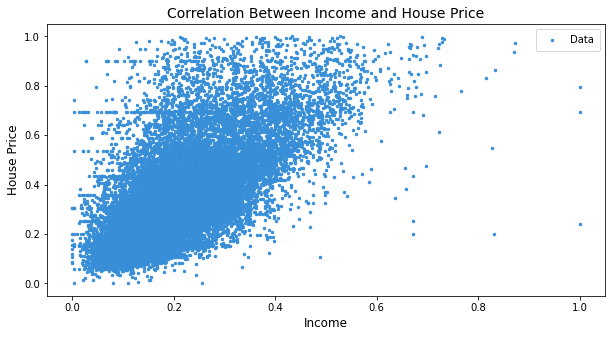

In [0]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.title('Correlation Between Income and House Price', fontSize=14)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()

 Looks like some values were clipped or some error in collection in data. 

Now this looks good.

In [0]:
import math
def SGD(X, y, lr = 0.01, epochs=100, batch_size = 1):  
    m = 0.0
    b = 0.0
    mse = []
    for _ in range(epochs):
        se_epoch = 0
        for j in range(0,len(y),batch_size):
            e = 0.0
            dm = 0.0
            db = 0.0
            for i in range(j,j+batch_size):
                if i >= len(y):
                    break
                yhat = X.iat[i] * m + b
                e += (yhat - y.iat[i])**2
                dm += 2 * (yhat - y.iat[i]) * X.iat[i]
                db += 2 * (yhat - y.iat[i])
            se_epoch += e
            m = m - (lr * dm)
            b = b - (lr * db)
        mse_epoch = se_epoch/len(y)    
        mse.append(mse_epoch)
    return m, b, mse

In [0]:
m, b,  mse = SGD(X, y, lr=0.01, epochs=10, batch_size=2)
print(m,b)

0.8947105831337689 0.04614455283723705


Plot the SGD curve(MSE against the epochs), and the line which represents the best fit of the given dataset.

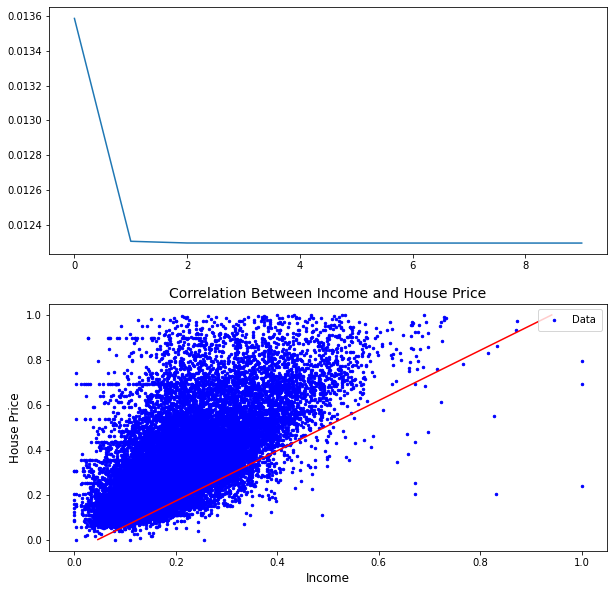

In [0]:
y_pred = m*X + b
t = range(0, 2, 1)
line = m*t + b
plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.plot(mse)
plt.subplot(212)
plt.scatter(X, y, label='Data', c='b', s=6)
plt.plot(line,t,c='r')
plt.title('Correlation Between Income and House Price', fontSize=14)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()

#**SVM**
Implementing Linear SVM from scrach with batch gradient descent and many o

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy import linalg as LA



---


**Generating Random linearly separable data**


---



In [0]:
np.random.seed(30)
data = [[np.random.rand(), np.random.rand()] for i in range(10)]
for i, point in enumerate(data):
    x, y = point
    if 0.5*x - y + 0.25 > 0:
        data[i].append(-1)
    else:
        data[i].append(1)



---


**Visualizing the above data**


---



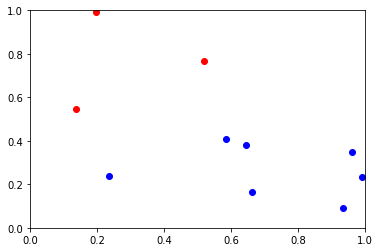

In [0]:
for x, y, l in data:
    if l == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
    plt.scatter(x, y, c=clr)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [0]:
# len(data[0])-1



---


**Train a SVM classifier using gradient descent and return a Weight Matrix which is a numpy array of length (N + 1) where N is dimension of training samples. You can refer to Fig. 1 in [this](https://www.cs.huji.ac.il/~shais/papers/ShalevSiSrCo10.pdf) paper for implementation. You can add arguments to svm_function according to your implementation.**


---



In [0]:
def compute_cost(W, X, Y, C):
#     hinge loss
    N = X.shape[0]
    distances = 1 - Y * (np.dot(X, W))
#     max(0, distance)
    distances[distances < 0] = 0  
    hinge_loss = (np.sum(distances) / N)
    cost = np.dot(W, W) + C * hinge_loss
    return cost
def calculate_cost_gradient(W, X, Y, C, lr):
    if type(Y) == np.float64:
        Y = np.array([Y])
        X = np.array([X])
    distance = 1 - (Y * np.dot(X, W))
    lambd = 1/C
#     using the subgradient method in a 
    I = (distance>=0).astype(int)
    W = W.reshape(len(W))
    di = np.mean(X*I.reshape(len(I),1)*Y.reshape(len(I),1), axis=0)
    dw = lr * (W * lambd - di) 
    dw[-1] -= lr * W[-1] * lambd
#     print(X_batch.shape,di.shape,dw.shape)
    return dw
def svm_function(x, y, epoch, C, lr, batch_size=1):
#     insert 1 in every row for intercept b
    x = np.concatenate((np.array(x), np.ones((x.shape[0],1))), axis=1)
    w = np.random.randn(x.shape[1],1)
    errors = []
    for _ in range(epochs):
        
#         np.random.shuffle(x)
#         
        for j in range(0,len(y),batch_size):
            start = j*batch_size
            end = min((j+1)*batch_size,len(x))
            delw = calculate_cost_gradient(w, x[start:end], y[start:end], C, lr)
            w = w.reshape((x.shape[1],1))
            w -= delw.reshape((x.shape[1],1))
            w = w.reshape(x.shape[1])
            
        cost_epoch = compute_cost(w, x, y, C)    
        errors.append(cost_epoch)
    return errors, w



---


**Run SVM Classifier**


---



In [0]:
data = np.asarray(data)
X = data[:,:2]
Y = data[:,2]
C = 1000000000
learning_rate = 0.001
epochs = 20000

errors, w = svm_function(X, Y, epochs, C, learning_rate)

In [0]:
w

array([-2.75506846,  5.66144892, -1.70522937])

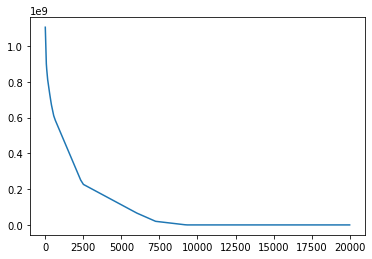

[-2.75506846  5.66144892 -1.70522937]


In [0]:
plt.plot(errors)
plt.show()
print(w)

# **Visualize the classifier**


---

Write a code to draw a lines corrosponding to 'w' vector you got as output from svm_function and for a line from which actual data was generated (0.5*x - y + 0.25). 

---



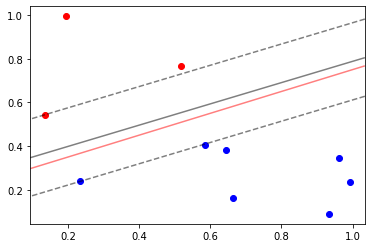

In [0]:
###################################
### Write your code here###########
###################################
from matplotlib import cm
m = w[1]/w[0]
c = w[2]/w[0]
y_pred = m*X + b
t = range(0, 2, 1)
line = m*t + b
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
for x, y, l in data:
    if l == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
    plt.scatter(x, y, c=clr)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 10)
yy = np.linspace(ylim[0], ylim[1], 10)

YY, XX = np.meshgrid(yy, xx)
ax.contour(XX, YY, w[0]*XX+w[1]*YY+w[2], colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
ax.contour(XX, YY, 0.5*XX - YY + 0.25, colors='r', levels=[0], alpha=0.5,
           linestyles=['-'])
plt.show()

The red line indicates the actual line and grey dotted lines are the support vector and grey line is the line learnt. 